# Experiment 1

*Feature Set 1 (Hahne):*
1. Logarithm of the variance (logVAR)

*Feature Set 2 (Hudgins):*
1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

*Feature Set 3 (Phinyomark):*
1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)



## Load Results

First: Import the library developed to visualize the results

In [14]:
import VisualizationFunctions as VF1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load of the DA-based adaptation techniques' results over the three databases (First Research Question).

In [15]:
place='../ResultsExp1_RQ1/'

# Nina Pro 5 database
database='NinaPro5'
resultsNinaPro5,timeNinaPro5=VF1.uploadResultsDatabase(place, database)

# Cote-Allard database
database='Cote'
resultsCote,timeCote=VF1.uploadResultsDatabase(place, database)

# EPN database
database='EPN'
resultsEPN,timeEPN=VF1.uploadResultsDatabase(place, database)


### load data

In [72]:

def uploadResultsDatabase(folder, database):
    if database == 'Nina5':
        samples = 3
        peoplei_i = 1
        peoplei_f = 10
    elif database == 'Cote':
        samples = 3
        peoplei_i = 20
        peoplei_f = 36
    elif database == 'EPN':
        samples = 24
        peoplei_i = 31
        peoplei_f = 60
    place = folder + database
    resultsTest = pd.read_csv(place + "_FeatureSet_1_startPerson_" + str(peoplei_i) + "_endPerson_" + str(peoplei_i) + ".csv")
    if len(resultsTest) != samples:
        print('error' + ' 1' + ' 1')
        print(len(resultsTest))

    for i in range(peoplei_i+1, peoplei_f + 1):
        auxFrame = pd.read_csv(place + "_FeatureSet_1_startPerson_" + str(i) + "_endPerson_" + str(i) + ".csv")
        resultsTest = pd.concat([resultsTest, auxFrame], ignore_index=True)
        if len(auxFrame) != samples:
            print('error' + ' 1 ' + str(i))
            print(len(auxFrame))
    for j in range(3, 4):
        for i in range(peoplei_i, peoplei_f + 1):
            auxFrame = pd.read_csv(
                place + "_FeatureSet_" + str(j) + "_startPerson_" + str(i) + "_endPerson_" + str(i) + ".csv")
            resultsTest = pd.concat([resultsTest, auxFrame], ignore_index=True)

            if len(auxFrame) != samples:
                print('error' + ' ' + str(j) + ' ' + str(i))
                print(len(auxFrame))

    return resultsTest.drop(columns='Unnamed: 0')





## One Shot
### LDA

In [31]:
Nina5=resultsNinaPro5['LDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['LDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['LDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ_L'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ_L'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ_L'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()

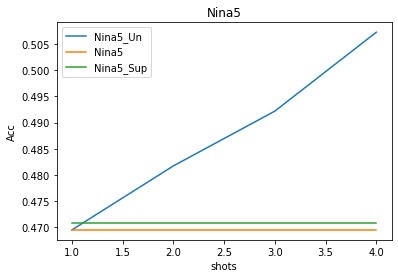

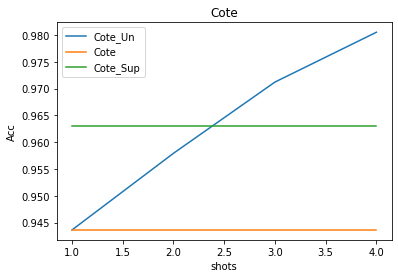

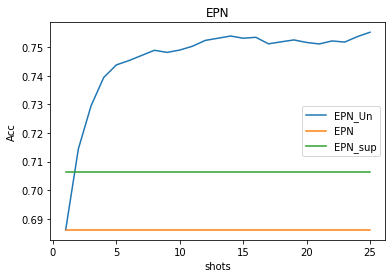

In [32]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccLDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccLDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccLDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccLDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccLDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

shot=1
Nina5=np.ones(4)*Nina5[shot-1]
Cote=np.ones(4)*Cote[shot-1]
EPN=np.ones(25)*EPN[shot-1]

Nina5_Prop=np.ones(4)*Nina5_Prop[shot-1]
Cote_Prop=np.ones(4)*Cote_Prop[shot-1]
EPN_Prop=np.ones(25)*EPN_Prop[shot-1]


x=[1,2,3,4]
plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x,CoteRQ2,label='Cote_Un')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
plt.plot(x,EPNRQ2,label='EPN_Un')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()






## One Shot
### QDA

In [6]:
Nina5=resultsNinaPro5['QDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['QDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['QDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()


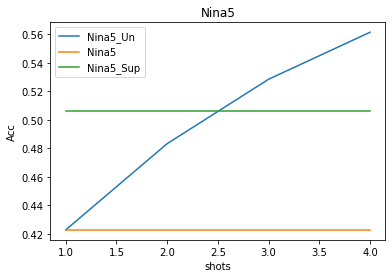

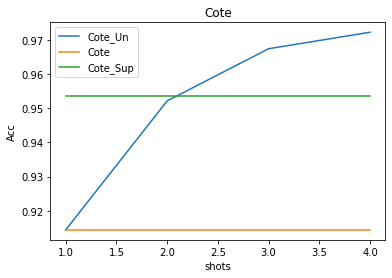

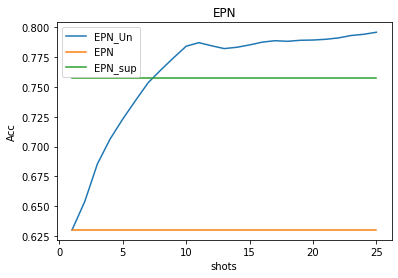

In [7]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccQDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccQDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccQDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccQDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccQDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

shot=1
Nina5=np.ones(4)*Nina5[shot-1]
Cote=np.ones(4)*Cote[shot-1]
EPN=np.ones(25)*EPN[shot-1]

Nina5_Prop=np.ones(4)*Nina5_Prop[shot-1]
Cote_Prop=np.ones(4)*Cote_Prop[shot-1]
EPN_Prop=np.ones(25)*EPN_Prop[shot-1]


x=[1,2,3,4]
plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x,CoteRQ2,label='Cote_Un')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
plt.plot(x,EPNRQ2,label='EPN_Un')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()


## Two Shot
### LDA

In [8]:
resultsNina5RQ2_2= pd.read_csv("Nina5_Uns_2Shots.csv")
resultsNina5RQ2= pd.read_csv("Nina5_Uns.csv")
resultsCoteRQ2_2= pd.read_csv("Cote_Uns_2Shots.csv")
resultsCoteRQ2= pd.read_csv("Cote_Uns.csv")
resultsEPNRQ2_2= pd.read_csv("EPN_Uns_2Shots.csv")
resultsEPNRQ2= pd.read_csv("EPN_Uns.csv")

In [9]:
Nina5=resultsNinaPro5['LDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['LDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['LDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ_L'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ_L'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ_L'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()


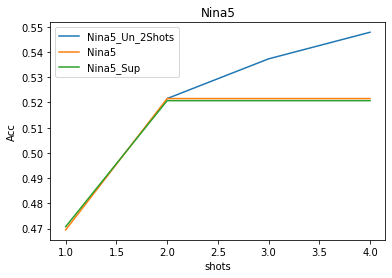

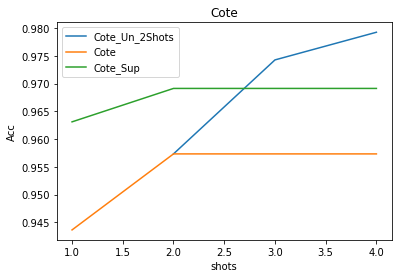

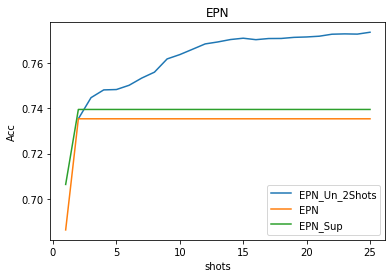

In [10]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccLDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccLDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccLDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccLDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccLDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()


Nina5RQ2_2=np.zeros(3)
CoteRQ2_2=np.zeros(3)
EPNRQ2_2=np.zeros(24)

Nina5RQ2_2[0]=resultsNina5RQ2_2['AccLDAInd'].loc[resultsNina5RQ2_2['# shots']==1].mean()
CoteRQ2_2[0]=resultsCoteRQ2_2['AccLDAInd'].loc[resultsCoteRQ2_2['# shots']==1].mean()
EPNRQ2_2[0]=resultsEPNRQ2_2['AccLDAInd'].loc[resultsEPNRQ2_2['# shots']==1].mean()


for i in range(1,3):
    Nina5RQ2_2[i]=resultsNina5RQ2_2['AccLDAProp'].loc[resultsNina5RQ2_2['# shots']==i].mean()
    CoteRQ2_2[i]=resultsCoteRQ2_2['AccLDAProp'].loc[resultsCoteRQ2_2['# shots']==i].mean()
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccLDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

for i in range(3,24):
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccLDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

shot=2
Nina5=np.hstack((Nina5[0],np.ones(3)*Nina5[shot-1]))
Cote=np.hstack((Cote[0],np.ones(3)*Cote[shot-1]))
EPN=np.hstack((EPN[0],np.ones(24)*EPN[shot-1]))

Nina5_Prop=np.hstack((Nina5_Prop[0],np.ones(3)*Nina5_Prop[shot-1]))
Cote_Prop=np.hstack((Cote_Prop[0],np.ones(3)*Cote_Prop[shot-1]))
EPN_Prop=np.hstack((EPN_Prop[0],np.ones(24)*EPN_Prop[shot-1]))


x=[1,2,3,4]
x2=[2,3,4]

plt.plot(x2,Nina5RQ2_2,label='Nina5_Un_2Shots')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
# plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x2,CoteRQ2_2,label='Cote_Un_2Shots')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
# plt.plot(x,CoteRQ2,label='Cote_Un')

plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
x2=[*range(2,26)]
plt.plot(x2,EPNRQ2_2,label='EPN_Un_2Shots')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_Sup')
# plt.plot(x,EPNRQ2,label='EPN_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()



## Two Shot
### QDA

In [11]:
Nina5=resultsNinaPro5['QDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['QDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['QDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()

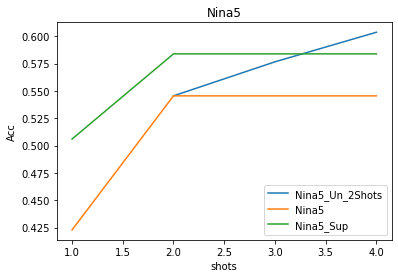

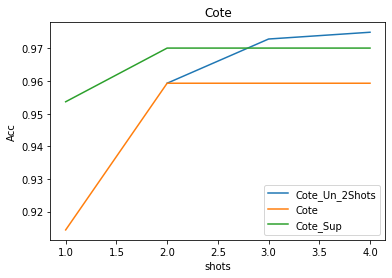

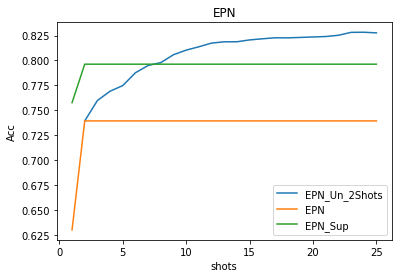

In [12]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccQDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccQDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccQDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccQDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccQDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

Nina5RQ2_2=np.zeros(3)
CoteRQ2_2=np.zeros(3)
EPNRQ2_2=np.zeros(24)

Nina5RQ2_2[0]=resultsNina5RQ2_2['AccQDAInd'].loc[resultsNina5RQ2_2['# shots']==1].mean()
CoteRQ2_2[0]=resultsCoteRQ2_2['AccQDAInd'].loc[resultsCoteRQ2_2['# shots']==1].mean()
EPNRQ2_2[0]=resultsEPNRQ2_2['AccQDAInd'].loc[resultsEPNRQ2_2['# shots']==1].mean()


for i in range(1,3):
    Nina5RQ2_2[i]=resultsNina5RQ2_2['AccQDAProp'].loc[resultsNina5RQ2_2['# shots']==i].mean()
    CoteRQ2_2[i]=resultsCoteRQ2_2['AccQDAProp'].loc[resultsCoteRQ2_2['# shots']==i].mean()
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccQDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

for i in range(3,24):
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccQDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

shot=2
Nina5=np.hstack((Nina5[0],np.ones(3)*Nina5[shot-1]))
Cote=np.hstack((Cote[0],np.ones(3)*Cote[shot-1]))
EPN=np.hstack((EPN[0],np.ones(24)*EPN[shot-1]))

Nina5_Prop=np.hstack((Nina5_Prop[0],np.ones(3)*Nina5_Prop[shot-1]))
Cote_Prop=np.hstack((Cote_Prop[0],np.ones(3)*Cote_Prop[shot-1]))
EPN_Prop=np.hstack((EPN_Prop[0],np.ones(24)*EPN_Prop[shot-1]))


x=[1,2,3,4]
x2=[2,3,4]

plt.plot(x2,Nina5RQ2_2,label='Nina5_Un_2Shots')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
# plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x2,CoteRQ2_2,label='Cote_Un_2Shots')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
# plt.plot(x,CoteRQ2,label='Cote_Un')

plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
x2=[*range(2,26)]
plt.plot(x2,EPNRQ2_2,label='EPN_Un_2Shots')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_Sup')
# plt.plot(x,EPNRQ2,label='EPN_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()



In [73]:
newResultsCote=uploadResultsDatabase('results/', 'Cote')
newResultsNina5=uploadResultsDatabase('results/', 'Nina5')
newResultsCote


error 3 6
2


,person,subset,# shots,Feature Set,AccLDAfew,AccLDAadapted,AccLDAsemi,AccLDAsemiAdapt,AccLDAsemi_shot,AccLDAsemiAdapt_shot,AccLDAsemi_accumulative,AccLDAsemiAdapt_accumulative,AccQDAfew,AccQDAadapted,AccQDAsemi,AccQDAsemiAdapt,AccQDAsemi_shot,AccQDAsemiAdapt_shot,AccQDAsemi_accumulative,AccQDAsemiAdapt_accumulative
0,20,"[1, 2]",2,1,0.949944,0.960191,0.973898,0.980438,0.973898,0.980438,0.973898,0.980438,0.931769,0.982377,0.983555,0.980989,0.983555,0.980989,0.983555,0.980989
1,20,"[1, 2, 3]",3,1,0.949944,0.960191,0.976255,0.979088,0.977149,0.978594,0.978879,0.981920,0.931769,0.982377,0.995304,0.987928,0.994734,0.988631,0.992129,0.983746
2,20,"[1, 2, 3, 4]",4,1,0.949944,0.960191,0.975856,0.979145,0.959487,0.963442,0.978156,0.977814,0.931769,0.982377,0.988232,0.980019,0.969050,0.959012,0.975038,0.970001
3,21,"[1, 2]",2,1,0.918914,0.936587,0.931836,0.934705,0.931836,0.934705,0.931836,0.934705,0.882238,0.954792,0.924311,0.963628,0.924311,0.963628,0.924311,0.963628
4,21,"[1, 2, 3]",3,1,0.918914,0.936587,0.958497,0.956445,0.958611,0.957148,0.958041,0.958535,0.882238,0.954792,0.934914,0.966688,0.933717,0.958649,0.927560,0.957927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,35,"[1, 2, 3]",3,3,0.845420,0.876389,0.885547,0.879828,0.871639,0.852735,0.903483,0.886782,0.886440,0.902951,0.902894,0.903692,0.912621,0.913742,0.918910,0.922634
98,35,"[1, 2, 3, 4]",4,3,0.845420,0.876389,0.859404,0.858378,0.857219,0.844280,0.888891,0.874432,0.886440,0.902951,0.878593,0.907681,0.882355,0.929683,0.900101,0.933027
99,36,"[1, 2]",2,3,0.912953,0.972187,0.997017,0.991166,0.997017,0.991166,0.997017,0.991166,0.934420,0.950283,0.976709,0.976538,0.976709,0.976538,0.976709,0.976538
100,36,"[1, 2, 3]",3,3,0.912953,0.972187,0.995099,0.990425,0.989019,0.985562,0.991907,0.989228,0.934420,0.950283,0.977792,0.981135,0.978685,0.981534,0.978818,0.980679


In [75]:

def vectroGraph(prop,adapt_normal,base,featureSet):
    vector=np.zeros(4)
    vector[0]=base[adapt_normal].loc[(base['# shots']==2)&(base['Feature Set']==featureSet)].mean()
    for i in range(1,4):
        vector[i]=base[prop].loc[(base['# shots']==i+1)&(base['Feature Set']==featureSet)].mean()
    return vector

In [88]:

def graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote):
    
    Nina5=resultsNinaPro5[DA+'_Ind'].loc[(resultsNinaPro5['Feature Set']==featureSet)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
    Cote=resultsCote[DA+'_Ind'].loc[(resultsCote['Feature Set']==featureSet)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
    EPN=resultsEPN[DA+'_Ind'].loc[(resultsEPN['Feature Set']==featureSet)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
    Nina5_Prop=resultsNinaPro5['PropQ'+propDA].loc[(resultsNinaPro5['Feature Set']==featureSet)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
    Cote_Prop=resultsCote['PropQ'+propDA].loc[(resultsCote['Feature Set']==featureSet)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
    EPN_Prop=resultsEPN['PropQ'+propDA].loc[(resultsEPN['Feature Set']==featureSet)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()


    Nina5prop1=vectroGraph('Acc'+DA+'semi','Acc'+DA+'few',newResultsNina5,featureSet)
    Nina5prop2=vectroGraph('Acc'+DA+'semi_shot','Acc'+DA+'few',newResultsNina5,featureSet)
    Nina5prop3=vectroGraph('Acc'+DA+'semi_accumulative','Acc'+DA+'few',newResultsNina5,featureSet)


    Coteprop1=vectroGraph('Acc'+DA+'semi','Acc'+DA+'few',newResultsCote,featureSet)
    Coteprop2=vectroGraph('Acc'+DA+'semi_shot','Acc'+DA+'few',newResultsCote,featureSet)
    Coteprop3=vectroGraph('Acc'+DA+'semi_accumulative','Acc'+DA+'few',newResultsCote,featureSet)


    Nina5propAdapt1=vectroGraph('Acc'+DA+'semiAdapt','Acc'+DA+'adapted',newResultsNina5,featureSet)
    Nina5propAdapt2=vectroGraph('Acc'+DA+'semiAdapt_shot','Acc'+DA+'adapted',newResultsNina5,featureSet)
    Nina5propAdapt3=vectroGraph('Acc'+DA+'semiAdapt_accumulative','Acc'+DA+'adapted',newResultsNina5,featureSet)


    CotepropAdapt1=vectroGraph('Acc'+DA+'semiAdapt','Acc'+DA+'adapted',newResultsCote,featureSet)
    CotepropAdapt2=vectroGraph('Acc'+DA+'semiAdapt_shot','Acc'+DA+'adapted',newResultsCote,featureSet)
    CotepropAdapt3=vectroGraph('Acc'+DA+'semiAdapt_accumulative','Acc'+DA+'adapted',newResultsCote,featureSet)



    shot=1
    Nina5=np.ones(4)*Nina5[shot-1]
    Cote=np.ones(4)*Cote[shot-1]
    # EPN=np.ones(25)*EPN[shot-1]

    Nina5_Prop=np.ones(4)*Nina5_Prop[shot-1]
    Cote_Prop=np.ones(4)*Cote_Prop[shot-1]
    # EPN_Prop=np.ones(25)*EPN_Prop[shot-1]


    x=[1,2,3,4]
    plt.plot(x,Nina5prop1,label='Nina5_Semi1')
    plt.plot(x,Nina5prop2,label='Nina5_Semi2')
    plt.plot(x,Nina5prop3,label='Nina5_Semi3')
    plt.plot(x,Nina5propAdapt1,label='Nina5_SemiAdapt1')
    plt.plot(x,Nina5propAdapt2,label='Nina5_SemiAdapt2')
    plt.plot(x,Nina5propAdapt3,label='Nina5_SemiAdapt3')

    plt.plot(x,Nina5,label='Nina5')
    plt.plot(x,Nina5_Prop,label='Nina5_Sup')
    plt.xlabel('shots')
    plt.ylabel('Acc')
    plt.title('Feature Set: '+str(featureSet)+'\n'+'Nina5'+' '+DA)
    plt.legend()
    plt.show()

    plt.plot(x,Coteprop1,label='Cote_Semi1')
    plt.plot(x,Coteprop2,label='Cote_Semi2')
    plt.plot(x,Coteprop3,label='Cote_Semi3')
    plt.plot(x,CotepropAdapt1,label='Cote_SemiAdapt1')
    plt.plot(x,CotepropAdapt2,label='Cote_SemiAdapt2')
    plt.plot(x,CotepropAdapt3,label='Cote_SemiAdapt3')

    plt.plot(x,Cote,label='Cote')
    plt.plot(x,Cote_Prop,label='Cote_Sup')
    plt.xlabel('shots')
    plt.ylabel('Acc')
    plt.title('Cote'+' '+DA)
    plt.legend()
    plt.show()

    # x=[*range(1,26)]
    # plt.plot(x,EPNRQ2,label='EPN_Un')
    # plt.plot(x,EPN,label='EPN')
    # plt.plot(x,EPN_Prop,label='EPN_sup')
    # plt.xlabel('shots')
    # plt.ylabel('Acc')
    # plt.title('EPN')
    # plt.legend()
    # plt.show()






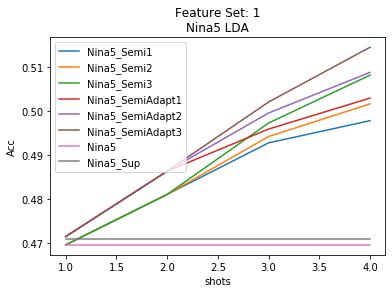

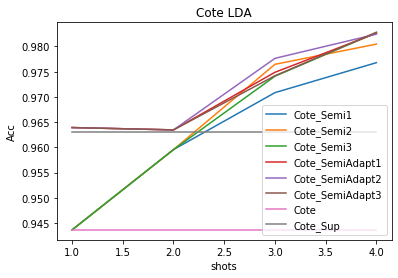

In [89]:
featureSet=1
DA='LDA'
propDA='_L'
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)

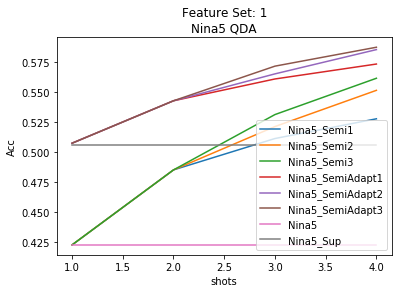

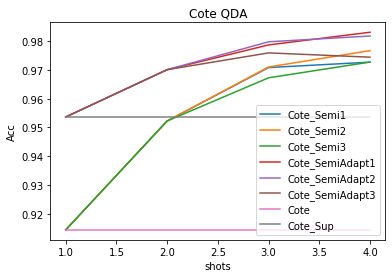

In [90]:
featureSet=1
DA='QDA'
propDA=''
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)

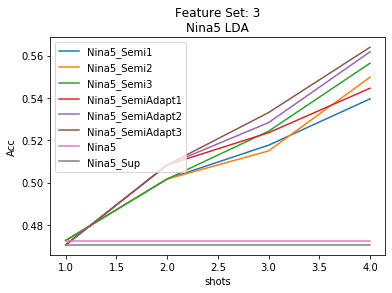

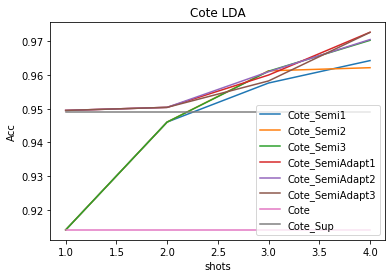

In [92]:
featureSet=3
DA='LDA'
propDA='_L'
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)

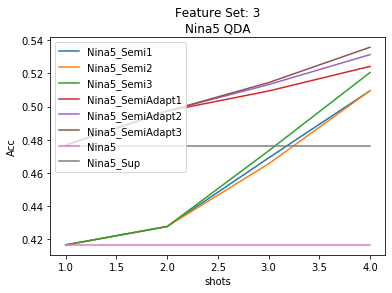

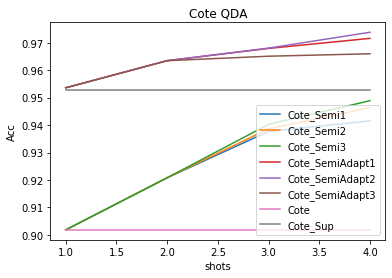

In [93]:
featureSet=3
DA='QDA'
propDA=''
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)